In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [3]:
#Load Dataset

df = pd.read_csv("results.csv",encoding="unicode_escape")

In [4]:
df.head(3)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [6]:
null_values = round((df.isnull().sum()/df.shape[0])*100,2)
print('\tPercentage of Null Values in Each Column \n\n',null_values)

	Percentage of Null Values in Each Column 

 Season       0.00
DateTime     0.00
HomeTeam     0.00
AwayTeam     0.00
FTHG         0.00
FTAG         0.00
FTR          0.00
HTHG         8.31
HTAG         8.31
HTR          8.31
Referee     25.41
HS          25.41
AS          25.41
HST         25.41
AST         25.41
HC          25.41
AC          25.41
HF          25.41
AF          25.41
HY          25.41
AY          25.41
HR          25.41
AR          25.41
dtype: float64


In [7]:
df.shape

(11113, 23)

In [8]:
df.dropna(inplace=True)

In [9]:
# Shape of Dataset After dropping the missing values ,because data before year 2000 had a lot of missing values
df.shape

(8289, 23)

In [10]:
df.isnull().sum(axis=1).value_counts()

0    8289
Name: count, dtype: int64

In [11]:
# Displaying Object type value counts of dataset Columns including NANs

def val_count(df):
    
    num_to_display = 10 
    for colname in df.dtypes[df.dtypes == 'object'].index:
        val_counts = df[colname].value_counts(dropna=False) # to see NANs as well
        print(val_counts[:num_to_display])
        if (len(val_counts)>num_to_display):
            print(f' \n only displaying first {num_to_display} of {len(val_counts)} values')
        print('\n\n') # just for more spaces inbetween    
        
val_count(df)

Season
2000-01    380
2001-02    380
2020-21    380
2019-20    380
2018-19    380
2017-18    380
2016-17    380
2015-16    380
2014-15    380
2013-14    380
Name: count, dtype: int64
 
 only displaying first 10 of 22 values



DateTime
2014-12-26T00:00:00Z    10
2011-05-22T00:00:00Z    10
2001-12-26T00:00:00Z    10
2015-01-01T00:00:00Z    10
2005-12-26T00:00:00Z    10
2010-05-09T00:00:00Z    10
2005-12-31T00:00:00Z    10
2001-05-19T00:00:00Z    10
2015-05-24T00:00:00Z    10
2018-05-13T00:00:00Z    10
Name: count, dtype: int64
 
 only displaying first 10 of 2675 values



HomeTeam
Man United     415
Arsenal        415
Everton        414
Liverpool      414
Tottenham      414
Chelsea        413
Man City       395
Newcastle      376
West Ham       358
Aston Villa    357
Name: count, dtype: int64
 
 only displaying first 10 of 44 values



AwayTeam
Liverpool      415
Tottenham      415
Chelsea        415
Everton        414
Man United     414
Arsenal        413
Man City       396
Newcastle  

In [12]:
print(df.dtypes)

Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object


In [13]:
df['DateTime'] =pd.to_datetime(df['DateTime'])

# Exploratory Data Analysis 

In [14]:
# How many matches were played in each season?

df['Season'].value_counts().reset_index().sort_values(by='Season',ascending=False)

,Season,count
21,2021-22,309
2,2020-21,380
3,2019-20,380
4,2018-19,380
5,2017-18,380
6,2016-17,380
7,2015-16,380
8,2014-15,380
9,2013-14,380
10,2012-13,380


380 matches are played among 20 teams in each season of EPL and each team plays 38 matches , 19 at home and 19 away. The Season 2021-2022 has only 309 Matches in our dataset because this dataset has data till the date 2022-04-10 whereas the season ended on 2022-05-22. 

In [15]:
# Which teams were involved in the most matches?

(df['HomeTeam'].value_counts() + df['AwayTeam'].value_counts()).sort_values(ascending=False).head(3)

Liverpool     829
Tottenham     829
Man United    829
Name: count, dtype: int64

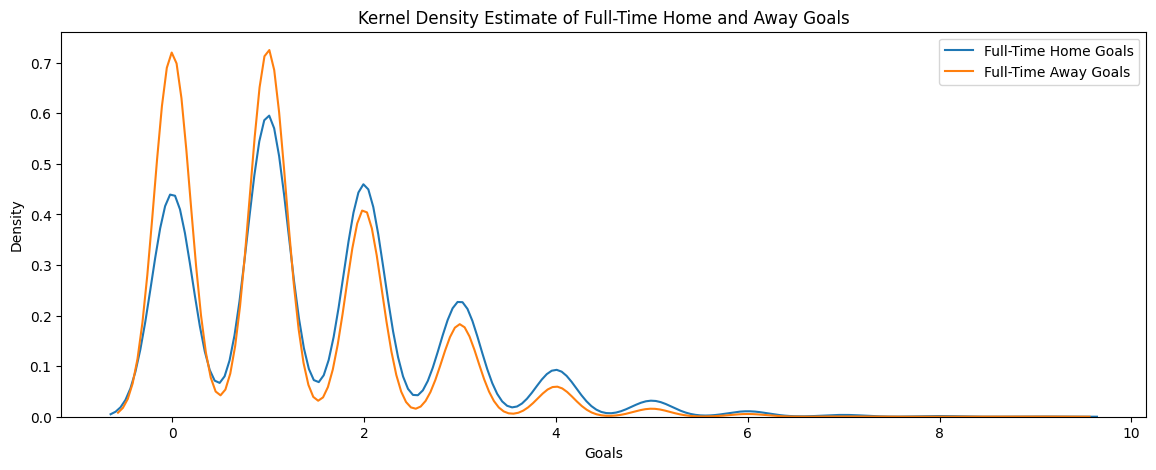

In [16]:
# What is the distribution of full-time home goals (FTHG) and away goals (FTAG)?

plt.figure(figsize=(14,5))
sns.kdeplot(data=df['FTHG'], label='Full-Time Home Goals')
sns.kdeplot(data=df['FTAG'], label='Full-Time Away Goals')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Full-Time Home and Away Goals')
plt.legend()
plt.show()

It's clearly visible that Full time Home Goals are increasing as we go from left to right , where as Full time away goals have a decreasing trend overall. This means that teams who play away tend to have a lower goal scoring rate than teams who play at home. This is a very important observation as it can be used to predict the outcome of a match.

In [17]:
# How many matches ended in a home win (FTR = 'H'), away win (FTR = 'A'), or draw (FTR = 'D')?

df['FTR'].value_counts().reset_index(name="Win Count")

,FTR,Win Count
0,H,3803
1,A,2417
2,D,2069


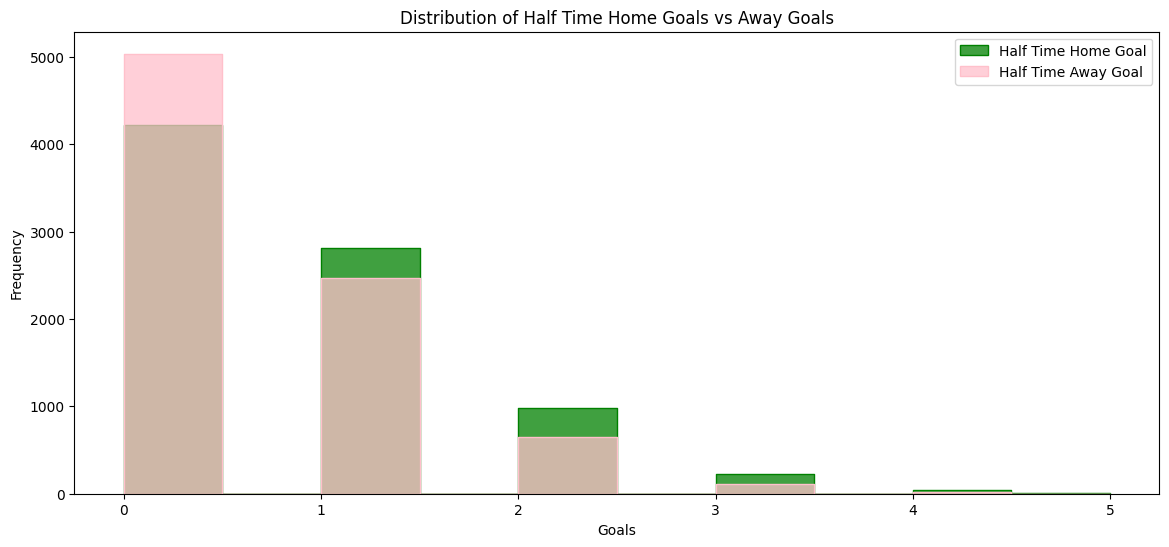

In [18]:
# What is the distribution of half-time home goals (HTHG) and away goals (HTAG)?

plt.figure(figsize=(14, 6))
sns.histplot(df['HTHG'], label="Half Time Home Goal", color='green', binwidth=0.5, element='step')
sns.histplot(df['HTAG'], label="Half Time Away Goal", color='pink', binwidth=0.5, element='step')
plt.title("Distribution of Half Time Home Goals vs Away Goals")
plt.legend()
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()

It can be clearly seen that Half Time Away goals have more frequency between 0 and 1 goals and it is gradually decreasing but Half Time Home goals have more frequency between 0 and 1 goals. This shows that Home teams are more likely to score more goals in the first half than Away teams.

In [19]:
# How does the half-time result (HTR) correlate with the full-time result (FTR)?

result_corr = pd.crosstab(df['FTR'],df['HTR'],normalize='index')
result_corr

HTR,A,D,H
FTR,,,
A,0.572197,0.365743,0.062060
D,0.187047,0.614790,0.198163
H,0.051801,0.332369,0.615830


The Correlation between Home Team FTR vs HTR is 0.61 which indicates a positive correlation. The correlation between Away Team HTR and FTR is 0.57 and this indicates a positive correlation , which means that if a team has more goals in the 1st half of the game then it is more likely to win the game.

In [20]:
# Who are the most frequent referees and how do they impact match outcomes?

# Top 3 Referees
df['Referee'].value_counts().reset_index().head(3)

,Referee,count
0,M Dean,523
1,M Atkinson,454
2,A Marriner,377


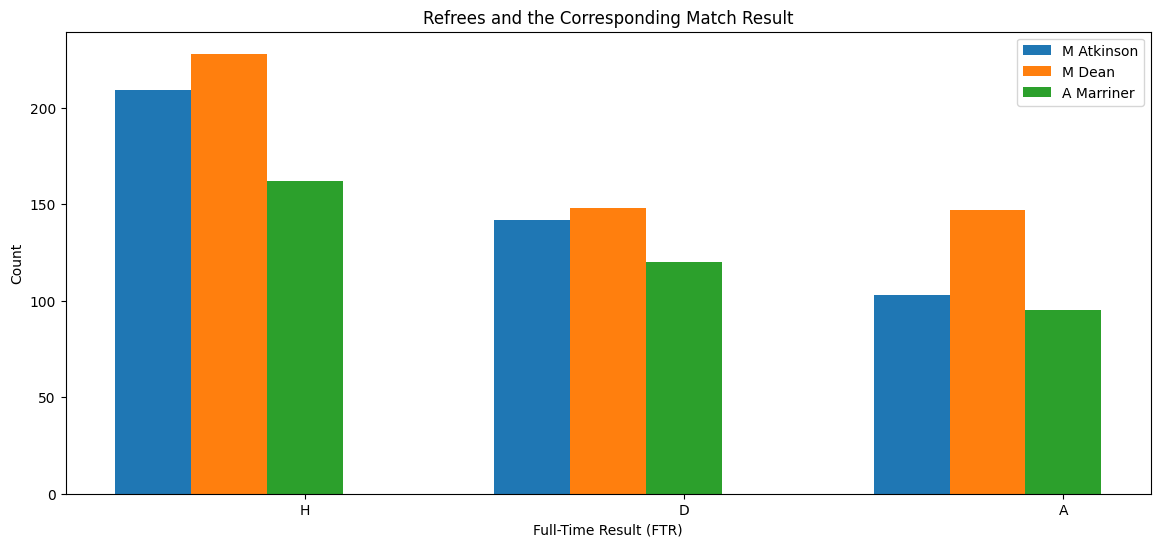

In [21]:
ref_dean = df[df['Referee'] == 'M Dean']['FTR'].value_counts().reset_index()
ref_atkinson = df[df['Referee'] == 'M Atkinson']['FTR'].value_counts()\
                .reset_index()
ref_Marriner = df[df['Referee'] == 'A Marriner']['FTR'].value_counts()\
                .reset_index()

datasets = [ref_atkinson,ref_dean,ref_Marriner]
bar_width=0.2
ftr_categories = ['H', 'D', 'A']

plt.figure(figsize=(14,6))
for i,dataset in enumerate(datasets):
    bar_positions = np.arange(len(ftr_categories)) + (i - 1) * bar_width
    plt.bar(bar_positions, dataset['count'],bar_width,)
    
plt.xlabel('Full-Time Result (FTR)')
plt.ylabel('Count')
plt.xticks(bar_positions,ftr_categories)
plt.title('Refrees and the Corresponding Match Result')
plt.legend(["M Atkinson","M Dean","A Marriner"])
plt.show()

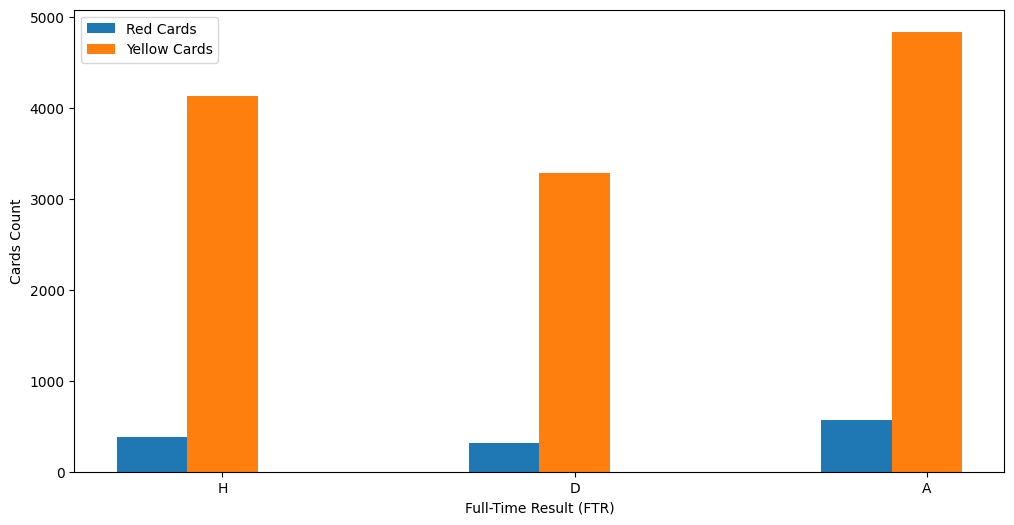

In [22]:
# Are there any trends between the number of yellow cards (HY, AY) and red cards (HR, AR) received by teams and match results?

df['total_redcards'] = df['HR'] + df['AR']
df['total_yellowcards'] = df['HY'] + df['HR']

groupby_redcards = df.groupby(['FTR'])['total_redcards'].sum().reset_index(name='count')
groupby_yellowcards = df.groupby(['FTR'])['total_yellowcards'].sum().reset_index(name='count')
grouped = [groupby_redcards,groupby_yellowcards]


plt.figure(figsize=(12,6))
for i,data in enumerate(grouped):
    
    bar_positions = np.arange(len(ftr_categories)) + (i - 1) * bar_width
    plt.bar(bar_positions, data['count'],bar_width,)
    
plt.xlabel('Full-Time Result (FTR)')
plt.ylabel('Cards Count')
plt.xticks(bar_positions,ftr_categories)
plt.legend(["Red Cards","Yellow Cards"])
plt.show()

In [23]:
# What is the average number of shots (HS, AS) per match for home and away teams?

average_home_shots = df['HS'].mean()
average_away_shots = df['AS'].mean()

print(f"Average Home Shots per Match: {average_home_shots:.2f}")
print(f"Average Away Shots per Match: {average_away_shots:.2f}")


Average Home Shots per Match: 13.50
Average Away Shots per Match: 10.64


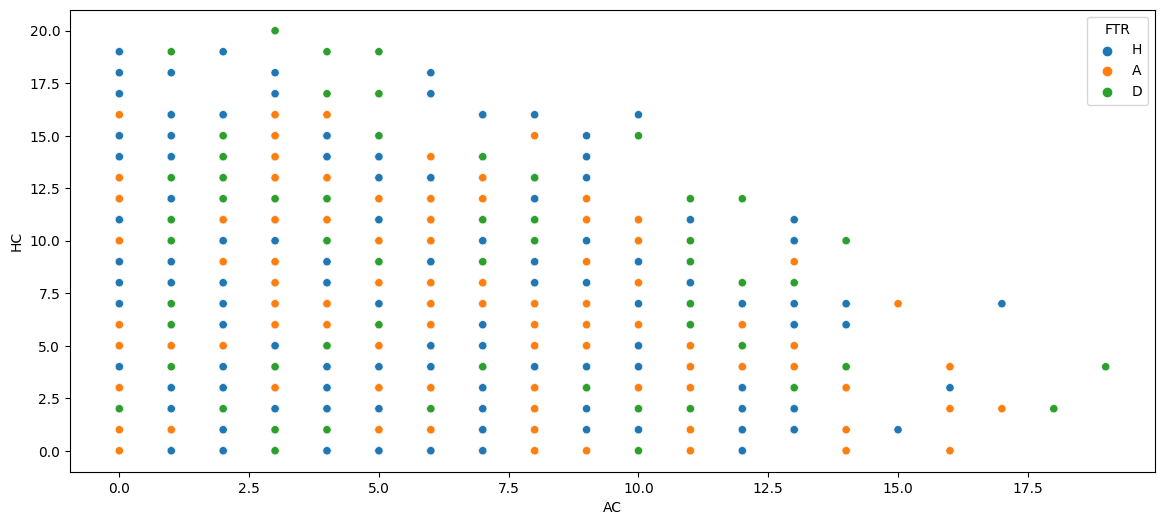

In [24]:
# Are there any relationships between the number of corners (HC, AC) and match outcomes?

plt.figure(figsize=(14,6))
sns.scatterplot(data = df , x = 'AC' , y= 'HC' , hue = 'FTR')
plt.show()

This scatter plot shows that as the corners increase the result also favors the particular side. This is because the corners are usually taken by the attacking team and the attacking team is more likely to win the match. This is also evident from the fact that the team with more corners has won 50% of the matches.

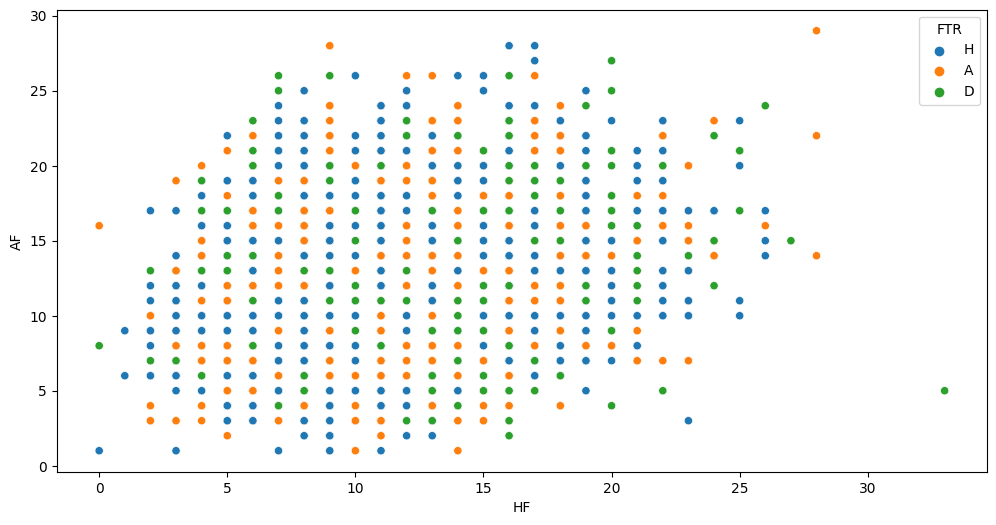

In [25]:

# Is there a correlation between the number of fouls committed (HF, AF) by a team and their match result?
plt.figure(figsize=(12,6))
sns.scatterplot(data = df , x='HF',y='AF',hue='FTR')
plt.show()

It is interesting to see that the teams that are conceding more fouls are also conceding more goals. Hence we can say that there is a correlation between the number of fouls conceded and the Full time result. 

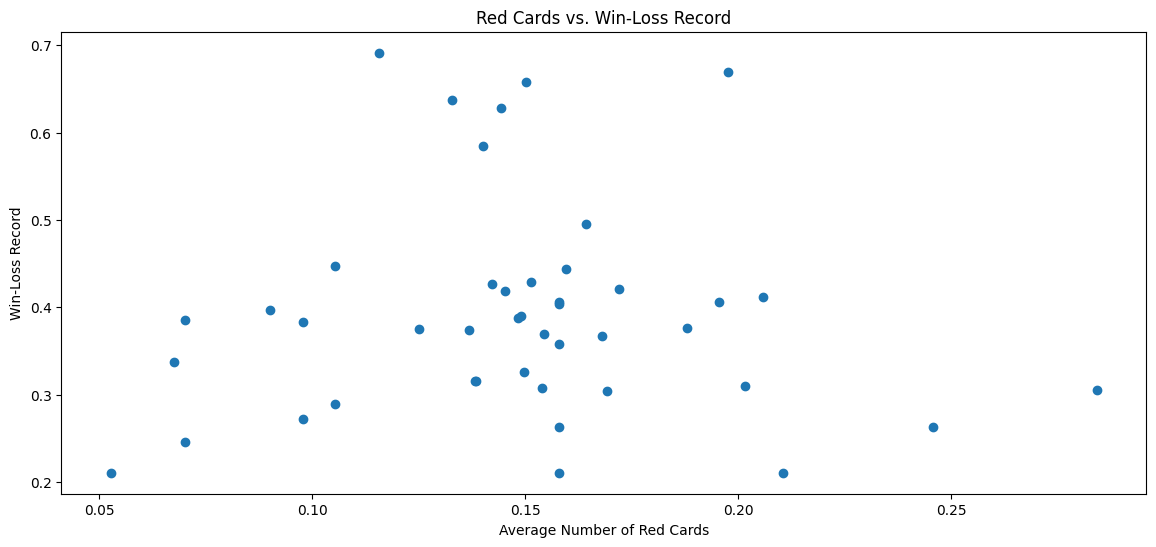

In [26]:
# Are there teams with a higher number of Red cards (HR, AR) that tend to lose more matches?

team_stats = df.groupby('HomeTeam').agg({'total_redcards': 'mean', 'FTR': lambda x: (x == 'H').sum() / x.count()})

# Sort the data by average number of Red cards
team_stats = team_stats.sort_values(by='total_redcards', ascending=False)

plt.figure(figsize=(14,6))
plt.scatter(team_stats['total_redcards'], team_stats['FTR'])

plt.xlabel('Average Number of Red Cards')
plt.ylabel('Win-Loss Record')
plt.title('Red Cards vs. Win-Loss Record')
plt.show()


Yes the Scatter plot shows that teams with higher avg red cards tend to lose more games than they win.This is because of the fact that when a team gets a red card, the player who gets the red card is suspended for the next game. This means that the team will be missing a key player in the next game. This will lead to the team losing the next game. This is the reason why teams with higher avg red cards tend to lose more games than they win.

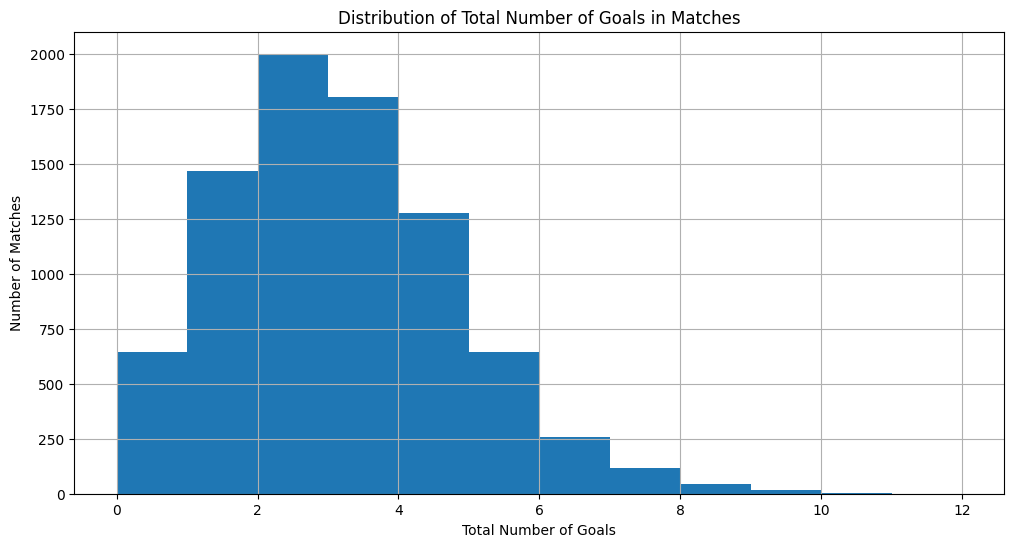

In [27]:
# How many matches had a certain number of goals (FTHG + FTAG)? 

df['total_goals'] = df['FTHG'] + df['FTAG']

# Group data by total number of goals and count the number of matches in each group
goal_counts = df.groupby('total_goals').size()

# Display results
plt.figure(figsize=(12,6))
plt.hist(goal_counts.index, weights=goal_counts.values, bins=range(goal_counts.index.max() + 2))

# Labels and Title
plt.xlabel('Total Number of Goals')
plt.ylabel('Number of Matches')
plt.title('Distribution of Total Number of Goals in Matches')
plt.grid(True)
plt.show()

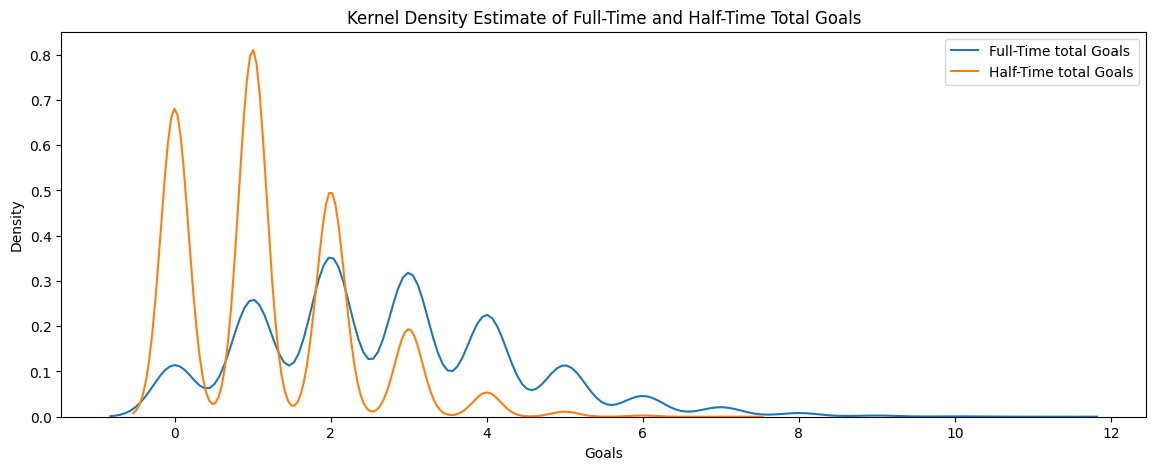

In [28]:
# Are there matches where the half-time goals (HTHG + HTAG) were significantly different from full-time goals

df['HT_total_goals'] = df['HTHG'] + df['HTAG']

plt.figure(figsize=(14,5))
sns.kdeplot(data=df['total_goals'], label='Full-Time total Goals')
sns.kdeplot(data=df['HT_total_goals'], label='Half-Time total Goals')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Full-Time and Half-Time Total Goals')
plt.legend()
plt.show()

In [29]:
# Is there a consistent home advantage?

ftr_count = df.groupby(['FTR']).size()

homewin_pct = ftr_count['H']/ftr_count.sum()

awaywin_pct = ftr_count['A']/ftr_count.sum()

print(f'Home Win Percentage: {homewin_pct:.2%}')
print(f'Away Win Percentage: {awaywin_pct:.2%}')

Home Win Percentage: 45.88%
Away Win Percentage: 29.16%


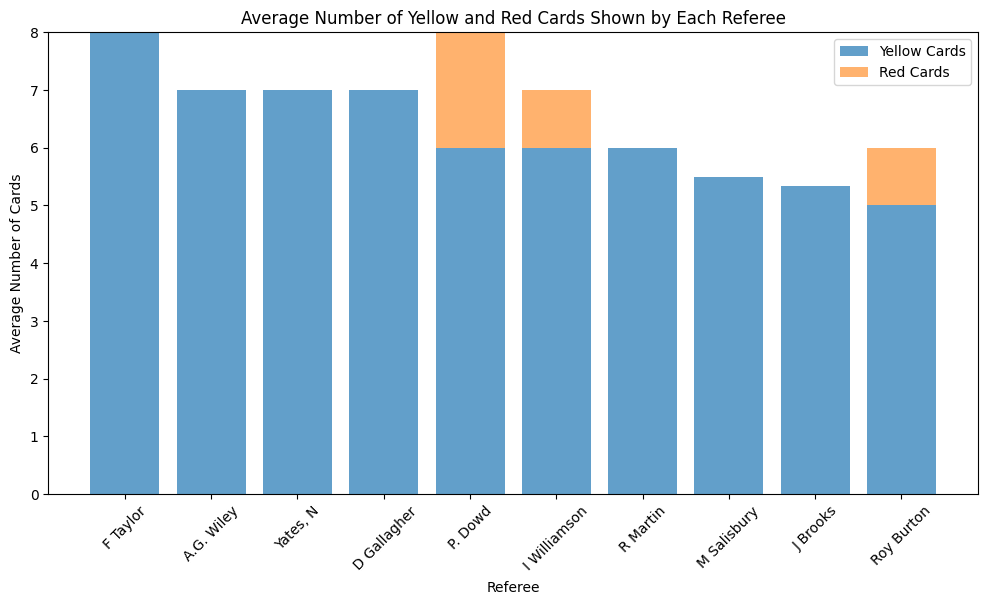

In [30]:
# Do certain referees show more cards (yellow and red) compared to others?

Referee_stats = df.groupby(['Referee']).agg({'HY':'mean','AY':'mean','HR':'mean','AR':'mean'}).reset_index()

Referee_stats['total_yellowcards'] = Referee_stats['HY']+Referee_stats['AY']
Referee_stats['total_redcards'] = Referee_stats['AR'] + Referee_stats['HR']

# Sort Values by Total Yellow and Red cards
Referee_stats =  Referee_stats.sort_values(by=['total_yellowcards','total_redcards'],ascending=False)

top_refs = Referee_stats.head(10)

# Visualize

plt.figure(figsize=(12,6))
plt.bar(top_refs.Referee, top_refs['total_yellowcards'], label='Yellow Cards',alpha=0.7)
plt.bar(top_refs.Referee, top_refs['total_redcards'], bottom=top_refs['total_yellowcards'], label='Red Cards',alpha=0.6)

# Add labels and title
plt.xlabel('Referee')
plt.ylabel('Average Number of Cards')
plt.title('Average Number of Yellow and Red Cards Shown by Each Referee')
plt.legend()

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [31]:
# Which teams have the highest shot conversion rates (goals per shots on target)?

df['home_conversion_rate'] = df.apply(lambda x: 0 if x['HST']==0 else x['FTHG']/x['HST'],axis=1)
df['away_conversion_rate'] = df.apply(lambda x: 0 if x['AST']==0 else x['FTAG']/x['AST'],axis=1)

# Group data by team and calculate the average shot conversion rate
grouped_conversion = df.groupby('HomeTeam')['home_conversion_rate'].mean().reset_index()
grouped_conversion_a = df.groupby('AwayTeam')['away_conversion_rate'].mean().reset_index()

grouped_conversion['away_conversion_rate'] = grouped_conversion_a['away_conversion_rate']

# Calculate overall average shot conversion rate for each team
grouped_conversion['overall_conversion_rate'] = (round((grouped_conversion['home_conversion_rate'] +
                                              grouped_conversion['away_conversion_rate']) / 2,4))*100

# Sorted data by overall average shot conversion rate
grouped_conversion = grouped_conversion.sort_values(by='overall_conversion_rate', ascending=False)

grouped_conversion.rename(columns={'HomeTeam':'Team','home_conversion_rate':'home_conversion','away_conversion_rate':'away_conversion','overall_conversion_rate':'overall_conversion'},inplace=True)


In [32]:
grouped_conversion.head(5)

,Team,home_conversion,away_conversion,overall_conversion
23,Leicester,0.308975,0.332173,32.06
8,Brentford,0.301265,0.325000,31.31
6,Bournemouth,0.330288,0.286391,30.83
15,Crystal Palace,0.281623,0.312536,29.71
0,Arsenal,0.297072,0.292806,29.49
